# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [358]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [360]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [364]:
 ## Write the code to load the dataset ##
df=pd.read_csv('hospital-info.csv')
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [366]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [370]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']
features

['Mortality national comparison',
 'Safety of care national comparison',
 'Readmission national comparison',
 'Patient experience national comparison',
 'Effectiveness of care national comparison',
 'Timeliness of care national comparison',
 'Efficient use of medical imaging national comparison']

In [372]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
# Filtering out the specified columns
filtered_df = df[features]

# Computing the descriptive statistics
descriptive_stats = filtered_df.describe()
descriptive_stats

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


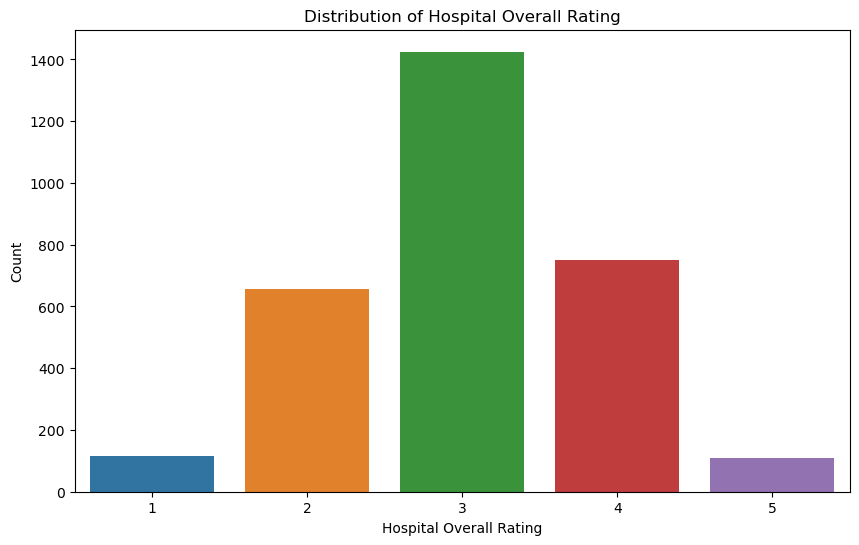

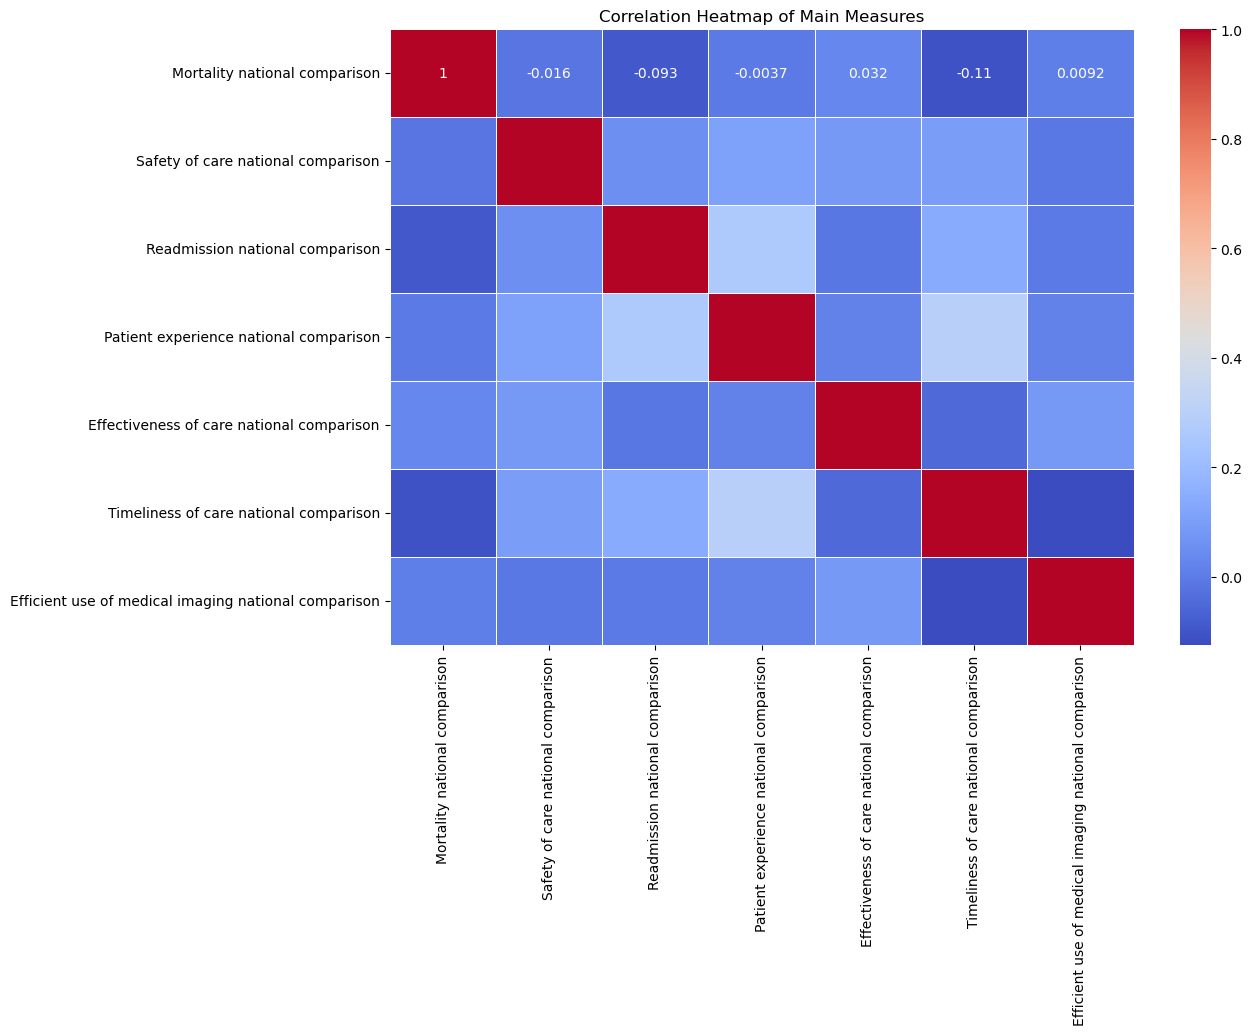

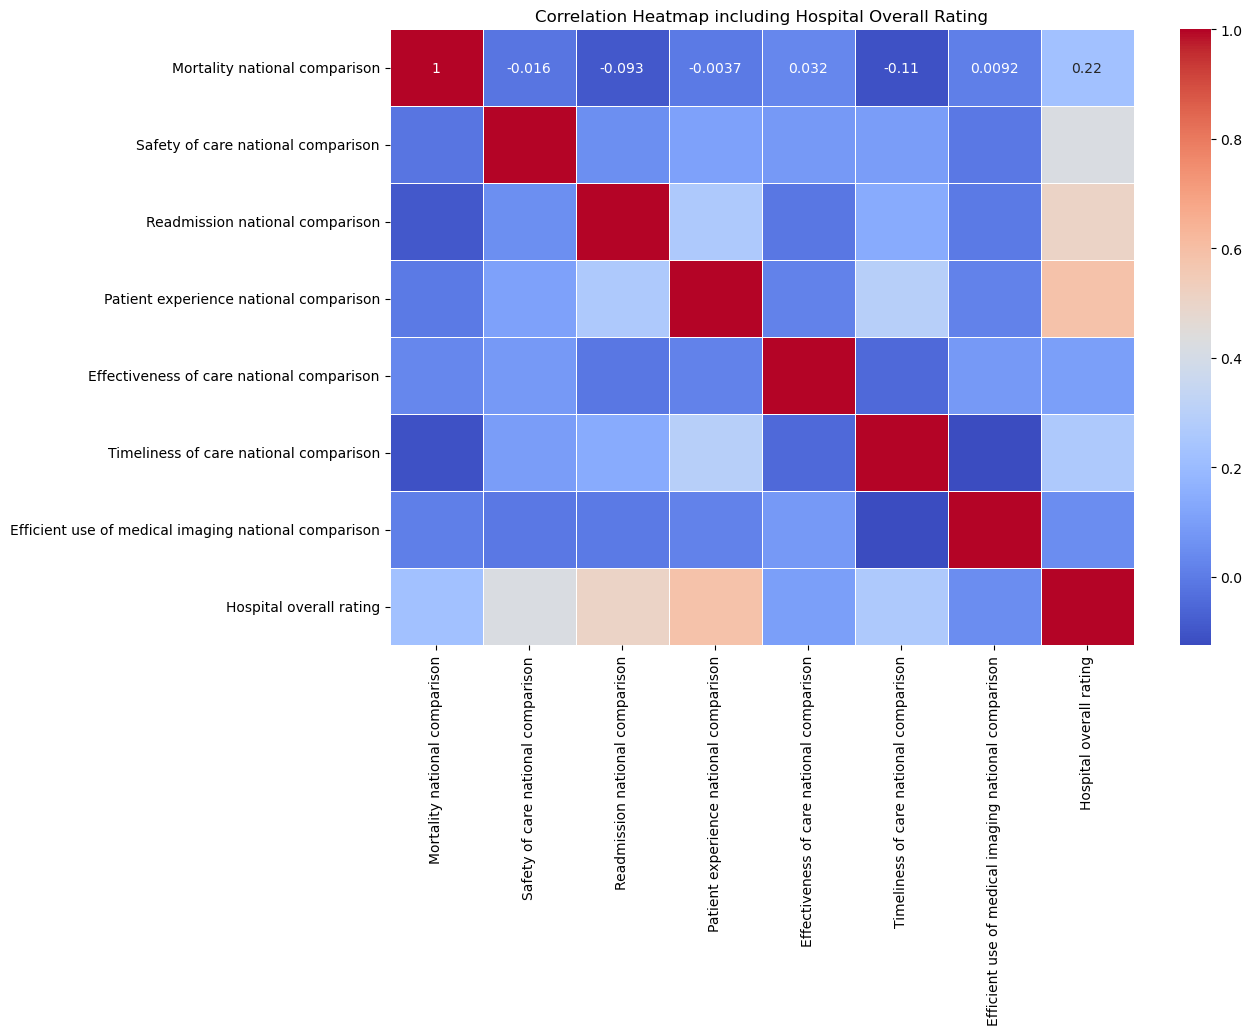

In [374]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures
# Plotting the distribution of "Hospital overall rating"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hospital overall rating')
plt.title('Distribution of Hospital Overall Rating')
plt.xlabel('Hospital Overall Rating')
plt.ylabel('Count')
plt.show()

# Plotting a correlation heatmap of the main measures
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Main Measures')
plt.show()

# Checking the correlations between "Hospital overall rating" and other measures
df_filtered_with_rating = df[features + ['Hospital overall rating']]
correlation_matrix_with_rating = df_filtered_with_rating.corr()

# Plotting the correlation heatmap including "Hospital overall rating"
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_with_rating, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap including Hospital Overall Rating')
plt.show()

In [376]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this

# Creating a pivot table for "Hospital overall rating" by "State"
pivot_state = pd.pivot_table(df, values='Hospital overall rating', index='State', aggfunc='mean').reset_index()
pivot_state


,State,Hospital overall rating
0,AK,2.857143
1,AL,3.038462
2,AR,2.697674
3,AZ,3.000000
4,CA,2.883392
5,CO,3.500000
6,CT,2.678571
7,DC,1.428571
8,DE,3.666667
9,FL,2.646341


In [378]:
# Creating a pivot table for "Hospital overall rating" by "Hospital Ownership"
pivot_ownership = pd.pivot_table(df, values='Hospital overall rating', index='Hospital Ownership', aggfunc='mean').reset_index()
pivot_ownership

,Hospital Ownership,Hospital overall rating
0,Government,2.878351
1,Others,2.959459
2,Voluntary,3.086569



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [383]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [385]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(columns=demo_features)
df2


,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,Voluntary,Yes,4,1,1,1,1,2,1,1,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,Voluntary,Yes,3,1,1,1,2,1,2,1,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,Others,Yes,3,1,1,1,0,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,Others,Yes,3,1,1,2,0,0,1,1,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


In [387]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head()

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [389]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping
#There are no unnecessary column that requires dropping.


##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [392]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
# Map the hospital ratings
df2['Hospital overall rating'] = df2['Hospital overall rating'].apply(lambda x: 0 if x in [1, 2, 3] else 1)
df2['Hospital overall rating']

0       0
1       0
2       0
3       0
4       0
       ..
3052    1
3053    0
3054    0
3055    0
3056    0
Name: Hospital overall rating, Length: 3057, dtype: int64

##### Convert the datatypes of the categorical variables

In [395]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next
categorical_columns = df2.select_dtypes(include=['object']).columns

# Converting categorical variables to 'category' data type
for col in categorical_columns:
    df2[col] = df2[col].astype('category')

print(df2.dtypes)
print(df2.head())


Hospital Ownership                    category
Emergency Services                    category
Hospital overall rating                  int64
Mortality national comparison            int64
Safety of care national comparison       int64
                                        ...   
MED_OP_11_Score                        float64
MED_OP_13_Score                        float64
MED_OP_14_Score                        float64
MED_OP_8_Score                         float64
MED_OP_9_Score                         float64
Length: 86, dtype: object
  Hospital Ownership Emergency Services  Hospital overall rating  \
0         Government                Yes                        0   
1         Government                Yes                        0   
2         Government                Yes                        0   
3          Voluntary                Yes                        0   
4             Others                Yes                        0   

   Mortality national comparison  Safety of care

##### Data Preparation and Train-test split

In [397]:
### Creating X and y variable
X = df2.drop(columns=['Hospital overall rating']) # All but the outcome column
y = df2['Hospital overall rating']

In [399]:
### Create the dummy variables for categorical variables
### Note - Make sure the "drop_first parameter" is correctly initialized for different ML models
### Hint - You can create multiple versions of the X dataset

# Using dummy variables for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)



In [401]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30

# Splitting the datasets into training and validation sets (70% train, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [403]:
# Scale and Standardize the numerical variables

scaler = StandardScaler()
numeric_cols = [col for col in X.columns if X[col].dtypes != 'category']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_valid[numeric_cols] = scaler.transform(X_valid[numeric_cols])


In [405]:
# Linear regression model - Using LassoCV to get the best LASSO model

# Creating LassoCV model
lasso_cv = LassoCV(cv=5, random_state=0)

# Fitting the model on the training data
lasso_cv.fit(X_train, y_train)

# Best alpha parameter obtained from cross-validation
best_alpha = lasso_cv.alpha_
print(f'Best alpha parameter: {best_alpha}')

# Predicting on the validation data
y_pred = lasso_cv.predict(X_valid)

# Calculating Mean Squared Error (MSE) as a metric
mse = mean_squared_error(y_valid, y_pred)
print(f'LassoCV Mean Squared Error: {mse}')

#Creating decision tree model
# Initialize Decision Tree Classifier with max_depth
max_depth = 5  # Adjust max_depth value as needed
dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=0)

dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = dt_classifier.predict(X_valid)

# Calculate Accuracy on validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f'Tree Model Accuracy: {accuracy}')

# Calculate Mean Squared Error on the validation set
mse = mean_squared_error(y_valid, y_pred)
print(f'Tree Mean Squared Error: {mse}')

#Creating KNN model
# Initialize the k-Nearest Neighbors Classifier with a specified number of neighbors
n_neighbors = 5  # Adjust n_neighbors value as needed
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fitting the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn_classifier.predict(X_valid)

# Calculate Accuracy on the validation set
accuracy = accuracy_score(y_valid, y_pred)
print(f'KNN Model Accuracy: {accuracy}')

# Calculate Mean Squared Error on the validation set
mse = mean_squared_error(y_valid, y_pred)
print(f'KNN Mean Squared Error: {mse}')


Best alpha parameter: 0.0032530051876506045
LassoCV Mean Squared Error: 0.059313163210184636
Tree Model Accuracy: 1.0
Tree Mean Squared Error: 0.0
KNN Model Accuracy: 0.8790849673202614
KNN Mean Squared Error: 0.12091503267973856


In [407]:
#linear regression

# Initialize Linear Regression model
lin_reg_model = LinearRegression()

# Fit the model
lin_reg_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = lin_reg_model.predict(X_train)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predict on validation set
y_valid_pred = lin_reg_model.predict(X_valid)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)

# Display RMSE values
print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {valid_rmse}")

#Calculating RMSE for decision tree (max depth pruned tree)
max_depth = 5  # Example depth, adjust as needed
dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
dt_model.fit(X_train, y_train)

# Predict on training set
y_train_pred = dt_model.predict(X_train)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
y_valid_pred = dt_model.predict(X_valid)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)

# Display RMSE values
print(f"Train RMSE (max_depth={max_depth}): {train_rmse}")
print(f"Validation RMSE (max_depth={max_depth}): {valid_rmse}")

#KNN
# Initialize KNN regressor
n_neighbors = 5  # Example number of neighbors, adjust as needed
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Fit the model
knn_model.fit(X_train, y_train)
# Predict on training set
y_train_pred = knn_model.predict(X_train)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Predict on validation set
y_valid_pred = knn_model.predict(X_valid)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)

# Display RMSE values
print(f"Train RMSE (KNN with {n_neighbors} neighbors): {train_rmse}")
print(f"Validation RMSE (KNN with {n_neighbors} neighbors): {valid_rmse}")

#Display the RMSEs
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=0),  # Example max_depth, adjust as needed
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store RMSE results
rmse_results = {'Model': [], 'Train RMSE': [], 'Validation RMSE': []}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = model.predict(X_train)

    # Calculate RMSE for training set
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

    # Predict on validation set
    y_valid_pred = model.predict(X_valid)

    # Calculate RMSE for validation set
    valid_rmse = mean_squared_error(y_valid, y_valid_pred, squared=False)

    # Store results in dictionary
    rmse_results['Model'].append(model_name)
    rmse_results['Train RMSE'].append(train_rmse)
    rmse_results['Validation RMSE'].append(valid_rmse)

# Create DataFrame for RMSE results
rmse_df = pd.DataFrame(rmse_results)

# Display RMSE results
print("\nRMSE Values:")
print(rmse_df)


Train RMSE: 0.23651515883775623
Validation RMSE: 0.24567239457779502
Train RMSE (max_depth=5): 0.0
Validation RMSE (max_depth=5): 0.0
Train RMSE (KNN with 5 neighbors): 0.22194529438902622
Validation RMSE (KNN with 5 neighbors): 0.3013043539769882

RMSE Values:
               Model  Train RMSE  Validation RMSE
0  Linear Regression    0.236515         0.245672
1      Decision Tree    0.000000         0.000000
2                KNN    0.221945         0.301304


In [409]:
# Applying regularization and hyperparameter tuning techniques to improve your model performance for each of the models.

#For Linear regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Define the model
ridge = Ridge()

# Defining the hyperparameters to tune
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Adjust alpha values as needed

# Performing Grid Search Cross-Validation to find the best hyperparameters
ridge_cv = GridSearchCV(ridge, parameters, cv=4, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f'Best alpha parameter for Ridge Regression: {best_alpha_ridge}')

# Predict on the validation set
y_pred_ridge = ridge_cv.predict(X_valid)

# Calculate RMSE on the validation set
rmse_ridge = np.sqrt(mean_squared_error(y_valid, y_pred_ridge))
print(f'Ridge Regression Validation RMSE: {rmse_ridge}')

#For Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Define the model
dt = DecisionTreeRegressor(random_state=0)

# Defining the hyperparameters to tune
parameters_dt = {'max_depth': [None, 5, 10, 15, 20]}  # Adjust max_depth values as needed

# Perform Grid Search Cross-Validation to find the best hyperparameters
dt_cv = GridSearchCV(dt, parameters_dt, cv=4, scoring='neg_mean_squared_error')
dt_cv.fit(X_train, y_train)

# Best max_depth parameter obtained from cross-validation
best_depth_dt = dt_cv.best_params_['max_depth']
print(f'Best max_depth parameter for Decision Tree: {best_depth_dt}')

# Predict on the validation set
y_pred_dt = dt_cv.predict(X_valid)

# Calculate RMSE on the validation set
rmse_dt = np.sqrt(mean_squared_error(y_valid, y_pred_dt))
print(f'Decision Tree Validation RMSE: {rmse_dt}')



# Define the model
knn = KNeighborsRegressor()

# Define the hyperparameters to tune
parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform Grid Search Cross-Validation to find the best hyperparameters
knn_cv = GridSearchCV(knn, parameters_knn, cv=4, scoring='neg_mean_squared_error')
knn_cv.fit(X_train, y_train)

# Best n_neighbors parameter obtained from cross-validation
best_neighbors_knn = knn_cv.best_params_['n_neighbors']
print(f'Best n_neighbors parameter for KNN: {best_neighbors_knn}')

# Predict on the validation set
y_pred_knn = knn_cv.predict(X_valid)

# Calculating RMSE on the validation set
rmse_knn = np.sqrt(mean_squared_error(y_valid, y_pred_knn))
print(f'KNN Validation RMSE: {rmse_knn}')

Best alpha parameter for Ridge Regression: 10
Ridge Regression Validation RMSE: 0.24559593357237208
Best max_depth parameter for Decision Tree: None
Decision Tree Validation RMSE: 0.0
Best n_neighbors parameter for KNN: 11
KNN Validation RMSE: 0.27675770135251315


By considering & observing the following data accuracies, we have came to the conclusion that Linear regresion model is the best model for this given dataset.

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [443]:
###Let's read the 'not_yet_rated dataset'
new =pd.read_csv("not_yet_rated.csv")

In [445]:
## Check the top 5 rows
new.head()

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [447]:
# Select features (excluding 'rating_group' and specified columns)
columns_to_drop = ['Provider ID', 'Hospital Ownership', 'Emergency Services']
new2 = new.drop(columns=columns_to_drop)
new2

,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,1,1,2,2,2,2,1,-12.500000,-3.331371,-8.2,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,2,1,2,2,2,2,1,-13.800000,-3.331371,-8.1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,1,1,1,1,1,2,1,-14.054091,-3.331371,-7.9,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,1,2,1,0,1,1,1,-15.700000,-3.400000,-7.9,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,1,1,1,1,0,2,1,-14.054091,-3.331371,-7.1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957
5,1,2,0,1,1,1,0,-14.200000,-2.600000,-8.7,...,-0.41000,-0.871177,-1.179000,-0.68600,-17.900000,-7.100000,-4.000000,-2.500000,-37.900000,-15.000000


In [449]:
categorical_columns = new2.select_dtypes(include=['object']).columns

# Converting categorical variables to 'category' data type
for col in categorical_columns:
    new2[col] = new2[col].astype('category')

print(new2.dtypes)
print(new2.head())

Mortality national comparison                  int64
Safety of care national comparison             int64
Readmission national comparison                int64
Patient experience national comparison         int64
Effectiveness of care national comparison      int64
                                              ...   
MED_OP_11_Score                              float64
MED_OP_13_Score                              float64
MED_OP_14_Score                              float64
MED_OP_8_Score                               float64
MED_OP_9_Score                               float64
Length: 83, dtype: object
   Mortality national comparison  Safety of care national comparison  \
0                              1                                   1   
1                              2                                   1   
2                              1                                   1   
3                              1                                   2   
4                              

In [463]:
### Create X and y variable
X = new2.drop(columns=['rating_group']) # All but the outcome column
y = new2['rating_group']

In [465]:
# Using dummy variables for categorical variables
categorical_cols2 = X.select_dtypes(include=['object']).columns
numerical_cols2 = X.select_dtypes(include=['int64', 'float64']).columns

# Converting categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the datasets into training and validation sets (70% train, 30% validation)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Scale and Standardize the numerical variables

scaler = StandardScaler()
numeric_cols2 = [col for col in X.columns if X[col].dtypes != 'category']

scaler = StandardScaler()
X_train2[numeric_cols2] = scaler.fit_transform(X_train2[numeric_cols2])
X_valid2[numeric_cols2] = scaler.transform(X_valid2[numeric_cols2])

In [467]:
# Linear model - USE LassoCV to get the best LASSO model

# Creating LassoCV model
lasso_cv = LassoCV(cv=4, random_state=0)

# Fitting the model on the training data
lasso_cv.fit(X_train2, y_train2)

# Best alpha parameter obtained from cross-validation
best_alpha = lasso_cv.alpha_
print(f'Best alpha parameter: {best_alpha}')

# Predicting on the validation data
y_pred2 = lasso_cv.predict(X_valid2)

# Calculate Mean Squared Error (MSE) as a metric
mse = mean_squared_error(y_valid2, y_pred2)
print(f'LassoCV Mean Squared Error: {mse}')

#Creating decision tree model
# Initialize Decision Tree Classifier with max_depth
max_depth = 5  # Adjust max_depth value as needed
dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=0)

dt_classifier.fit(X_train2, y_train2)

# Predict on the validation set
y_pred2 = dt_classifier.predict(X_valid2)

# Calculate Accuracy on validation set
accuracy = accuracy_score(y_valid2, y_pred2)
print(f'Tree Model Accuracy: {accuracy}')

# Calculate Mean Squared Error on the validation set
mse = mean_squared_error(y_valid2, y_pred2)
print(f'Tree Mean Squared Error: {mse}')

#Creating KNN model
# Initialize the k-Nearest Neighbors Classifier with a specified number of neighbors
n_neighbors = 4 
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the classifier on the training data
knn_classifier.fit(X_train2, y_train2)

# Predict on the validation set
y_pred = knn_classifier.predict(X_valid2)

# Calculate Accuracy on the validation set
accuracy = accuracy_score(y_valid2, y_pred2)
print(f'KNN Model Accuracy: {accuracy}')

# Calculate Mean Squared Error on the validation set
mse = mean_squared_error(y_valid2, y_pred2)
print(f'KNN Mean Squared Error: {mse}')


Best alpha parameter: 0.0004999999999999999
LassoCV Mean Squared Error: 0.24545067690370123
Tree Model Accuracy: 1.0
Tree Mean Squared Error: 0.0
KNN Model Accuracy: 1.0
KNN Mean Squared Error: 0.0


In [486]:
#linear regression

# Initialize Linear Regression model
lin_reg_model = LinearRegression()

# Fit the model
lin_reg_model.fit(X_train2, y_train2)

# Predict on training set
y_train_pred2 = lin_reg_model.predict(X_train2)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train2, y_train_pred2, squared=False)

# Predict on validation set
y_valid_pred2 = lin_reg_model.predict(X_valid2)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid2, y_valid_pred2, squared=False)

# Display RMSE values
print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {valid_rmse}")

#Calculating RMSE for decision tree (max depth pruned tree)
max_depth = 5  
dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
dt_model.fit(X_train2, y_train2)

# Predict on training set
y_train_pred2 = dt_model.predict(X_train2)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train2, y_train_pred2, squared=False)
y_valid_pred2 = dt_model.predict(X_valid2)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid2, y_valid_pred2, squared=False)

# Display RMSE values
print(f"Train RMSE (max_depth={max_depth}): {train_rmse}")
print(f"Validation RMSE (max_depth={max_depth}): {valid_rmse}")

#KNN
# Initialize KNN regressor
n_neighbors = 4  # Example number of neighbors, adjust as needed
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Fit the model
knn_model.fit(X_train2, y_train2)
# Predict on training set
y_train_pred2 = knn_model.predict(X_train2)

# Calculate RMSE for training set
train_rmse = mean_squared_error(y_train2, y_train_pred2, squared=False)

# Predict on validation set
y_valid_pred2 = knn_model.predict(X_valid2)

# Calculate RMSE for validation set
valid_rmse = mean_squared_error(y_valid2, y_valid_pred2, squared=False)

# Display RMSE values
print(f"Train RMSE (KNN with {n_neighbors} neighbors): {train_rmse}")
print(f"Validation RMSE (KNN with {n_neighbors} neighbors): {valid_rmse}")

#Display the RMSEs
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=0),  # Example max_depth, adjust as needed
    'KNN': KNeighborsRegressor(n_neighbors=3)
}

# Dictionary to store RMSE results
rmse_results = {'Model': [], 'Train RMSE': [], 'Validation RMSE': []}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train2, y_train2)

    # Predict on training set
    y_train_pred2 = model.predict(X_train2)

    # Calculate RMSE for training set
    train_rmse = mean_squared_error(y_train2, y_train_pred2, squared=False)

    # Predict on validation set
    y_valid_pred2 = model.predict(X_valid2)

    # Calculate RMSE for validation set
    valid_rmse = mean_squared_error(y_valid2, y_valid_pred2, squared=False)

    # Store results in dictionary
    rmse_results['Model'].append(model_name)
    rmse_results['Train RMSE'].append(train_rmse)
    rmse_results['Validation RMSE'].append(valid_rmse)

# Create DataFrame for RMSE results
rmse_df = pd.DataFrame(rmse_results)

# Display RMSE results
print("\nRMSE Values:")
print(rmse_df)


Train RMSE: 2.482534153247273e-16
Validation RMSE: 0.3873628266489077
Train RMSE (max_depth=5): 0.0
Validation RMSE (max_depth=5): 0.0
Train RMSE (KNN with 4 neighbors): 0.5
Validation RMSE (KNN with 4 neighbors): 0.5

RMSE Values:
               Model    Train RMSE  Validation RMSE
0  Linear Regression  2.482534e-16         0.387363
1      Decision Tree  0.000000e+00         0.000000
2                KNN  3.333333e-01         0.527046


In [488]:
# Applying regularization and hyperparameter tuning techniques to improve your model performance for each of the models.

#For Linear regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Define the model
ridge = Ridge()
# Define the hyperparameters to tune
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  
# Perform Grid Search Cross-Validation to find the best hyperparameters
ridge_cv = GridSearchCV(ridge, parameters, cv=4, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train2, y_train2)

# Best alpha parameter obtained from cross-validation
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f'Best alpha parameter for Ridge Regression: {best_alpha_ridge}')

# Predict on the validation set
y_pred_ridge2 = ridge_cv.predict(X_valid2)

# Calculate RMSE on the validation set
rmse_ridge = np.sqrt(mean_squared_error(y_valid2, y_pred_ridge2))
print(f'Ridge Regression Validation RMSE: {rmse_ridge}')

#For Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Define the model
dt = DecisionTreeRegressor(random_state=0)

# Define the hyperparameters to tune
parameters_dt = {'max_depth': [None, 5, 10, 15, 20]}  # Adjust max_depth values as needed

# Perform Grid Search Cross-Validation to find the best hyperparameters
dt_cv = GridSearchCV(dt, parameters_dt, cv=4, scoring='neg_mean_squared_error')
dt_cv.fit(X_train2, y_train2)

# Best max_depth parameter obtained from cross-validation
best_depth_dt = dt_cv.best_params_['max_depth']
print(f'Best max_depth parameter for Decision Tree: {best_depth_dt}')

# Predict on the validation set
y_pred_dt2 = dt_cv.predict(X_valid2)

# Calculate RMSE on the validation set
rmse_dt = np.sqrt(mean_squared_error(y_valid2, y_pred_dt2))
print(f'Decision Tree Validation RMSE: {rmse_dt}')

# For KNN model
knn = KNeighborsRegressor()

# Define the hyperparameters to tune
parameters_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform Grid Search Cross-Validation to find the best hyperparameters
knn_cv = GridSearchCV(knn, parameters_knn, cv=4, scoring='neg_mean_squared_error')
knn_cv.fit(X_train2, y_train2)

# Best n_neighbors parameter obtained from cross-validation
best_neighbors_knn = knn_cv.best_params_['n_neighbors']
print(f'Best n_neighbors parameter for KNN: {best_neighbors_knn}')

# Predict on the validation set
y_pred_knn2 = knn_cv.predict(X_valid2)

# Calculate RMSE on the validation set
rmse_knn = np.sqrt(mean_squared_error(y_valid2, y_pred_knn2))
print(f'KNN Validation RMSE: {rmse_knn}')


Best alpha parameter for Ridge Regression: 0.001
Ridge Regression Validation RMSE: 0.38736362918987927
Best max_depth parameter for Decision Tree: None
Decision Tree Validation RMSE: 0.0
Best n_neighbors parameter for KNN: 3
KNN Validation RMSE: 0.5270462766947299


By performing the above predictions and comparing the accuracies we can say that Linear regression is the best model for dataset "not_yet_rated".csv


### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [492]:
#Since I have used a linear regression model,I have identified the measures which have a positive & neagative influence on the overall hospital ratings.
coefficients = pd.DataFrame({'Feature': X_train2.columns, 'Coefficient': lin_reg_model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

                                      Feature  Coefficient
77                            MED_OP_11_Score     0.015215
2             Readmission national comparison     0.014934
4   Effectiveness of care national comparison     0.014863
50             EXP_H_COMP_4_STAR_RATING_Score     0.014730
57                    EXP_H_STAR_RATING_Score     0.014661
..                                        ...          ...
69                    SAFETY_HAI_1a_SIR_Score    -0.010404
58                 SAFETY_COMP_HIP_KNEE_Score    -0.011058
23                              EFF_EDV_Score    -0.011215
9                          MORT_30_COPD_Score    -0.013133
18                   READM_30_HOSP_WIDE_Score    -0.014423

[82 rows x 2 columns]


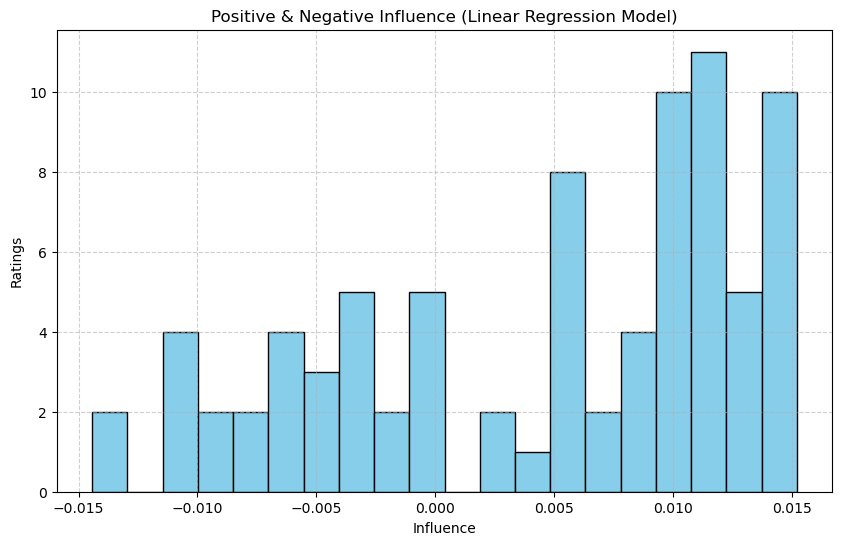

In [477]:
# Get coefficients
coefficients = lin_reg_model.coef_

# Plotting histogram of coefficients
plt.figure(figsize=(10, 6))
plt.hist(coefficients, bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Influence')
plt.ylabel('Ratings')
plt.title('Positive & Negative Influence (Linear Regression Model)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Features where low-rated hospitals are lagging behind:
                                              Feature  Coefficient  \
77                                    MED_OP_11_Score     0.015215   
2                     Readmission national comparison     0.014934   
4           Effectiveness of care national comparison     0.014863   
50                     EXP_H_COMP_4_STAR_RATING_Score     0.014730   
57                            EXP_H_STAR_RATING_Score     0.014661   
..                                                ...          ...   
39                                    EFF_STK_5_Score     0.000000   
38                                    EFF_STK_4_Score     0.000000   
37                                    EFF_STK_2_Score     0.000000   
36                                   EFF_STK_10_Score     0.000000   
6   Efficient use of medical imaging national comp...     0.000000   

    Absolute_Coefficient  
77              0.015215  
2               0.014934  
4               0.01486

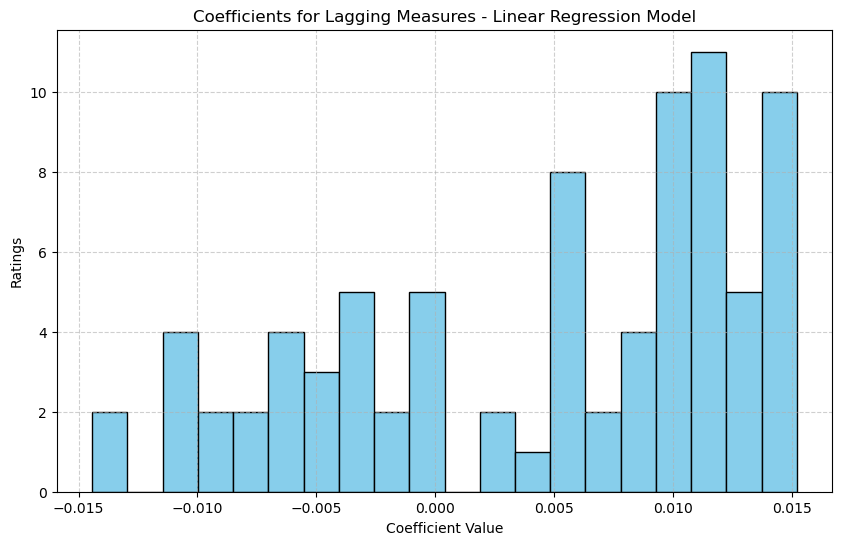

In [479]:
##Identifying which  measures of a low-rated hospital is currently lagging behind, which also have to be improved.
# Predict on validation set
y_pred = lin_reg_model.predict(X_valid2)

# Calculate residuals
residuals = y_valid2 - y_pred2

# Define low-rated hospitals based on residuals
low_rated_hospitals = residuals <= 0  # Example: Consider hospitals with residuals <= 0 as low-rated

# Create DataFrame of coefficients
coefficients = pd.DataFrame({'Feature': X_train2.columns, 'Coefficient': lin_reg_model.coef_})

# Sort coefficients by magnitude (absolute value) to easily compare positive and negative influences
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

# Identify features where low-rated hospitals are lagging behind (lower coefficients)
lagging_measures = coefficients[coefficients['Feature'].isin(X_train2.columns)]

# Display features where low-rated hospitals have lower coefficients
print("Features where low-rated hospitals are lagging behind:")
print(lagging_measures)

# Plot histogram of coefficients for these lagging measures
lagging_coefficients = lagging_measures['Coefficient']

plt.figure(figsize=(10, 6))
plt.hist(lagging_coefficients, bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Ratings')
plt.title('Coefficients for Lagging Measures - Linear Regression Model')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()